# Historical Quality Graphs

## Initial Setup

In [2]:
import numpy as np
import pandas as pd
import glob as glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = '8'

## Reading the data

Eventually a function.
    * Loop through all CSV
    * Read_CSV, certain columns
    * Concatenate CSVs with a multi-index.

In [3]:
files = glob.glob('*.csv')
files

['BBFM.csv',
 'BellB.csv',
 'EFM.csv',
 'FCN.csv',
 'FFMC.csv',
 'FHA.csv',
 'IFP.csv',
 'LFM.csv',
 'NCFP.csv',
 'NSFM.csv',
 'SFM.csv',
 'WFM.csv']

### Example with a single file

In [13]:
# Get the data, only the relevant columns
ncfp = pd.read_csv("NCFP.csv", 
                    usecols=["lastupdate", "metricname", "ptsseen_avg"],
                    parse_dates=["lastupdate"])

# Unstack the CSV into a table.
pivot = ncfp.pivot_table(index='lastupdate', 
                    columns='metricname', 
                    values="ptsseen_avg")

# We don't use the FIT measure 
pivot = pivot.drop('FIT', 1)
pivot

metricname,COLORECTAL,DM-EYE,DM-FOOT,DM-KIDNEY,DM-PPSV,MAMMO,PAP,TDAP
lastupdate,,,,,,,,
2016-12-05,56.3389,37.5923,68.7838,70.6794,65.7311,60.2389,53.2197,71.8805
2016-12-06,56.5203,37.4260,68.9349,70.5621,66.1242,60.3713,53.5926,72.0513
2016-12-07,56.4887,NaN,69.3333,71.1111,66.3703,60.3072,53.5714,72.1131
2016-12-08,56.5340,NaN,69.3333,71.2592,66.3703,60.2687,53.5898,72.1595
2016-12-09,56.5725,37.8799,69.6071,71.4426,66.6419,60.1920,53.7717,72.1891
2016-12-11,56.5560,38.0386,69.9851,72.0653,67.0133,60.0641,54.1666,72.2926
2016-12-12,56.5203,38.9301,70.2823,72.2139,67.0133,60.2178,54.1633,72.3003
2016-12-13,56.5025,39.1369,70.3869,72.0238,67.2619,60.2818,54.2982,72.4185
2016-12-14,56.6782,39.5522,70.8955,72.0895,67.3134,60.3326,54.3929,72.5447


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1191e9208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1194edbe0>], dtype=object)

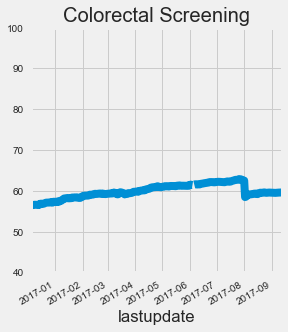

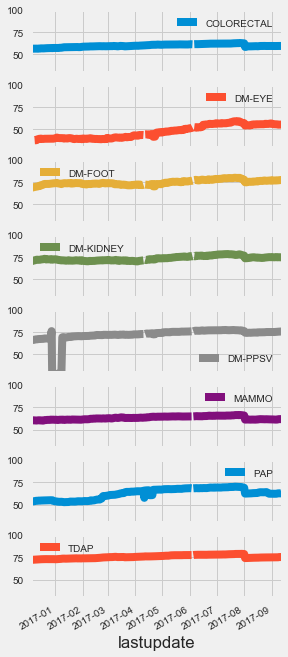

In [17]:
# Some basic graphs
pivot["COLORECTAL"].plot(ylim=(40,100), legend=False, title="Colorectal Screening", figsize=(4,5))
pivot.plot(subplots=True, ylim=(30,100), figsize=(4, 12))